In [24]:
import pandas as pd
import seaborn as sns

In [25]:
df1 = pd.read_csv("STI sample.csv")
df1.head(3)

,no.,salary
0,1,58152000
1,2,65448000
2,3,55728000


In [26]:
vt_group = pd.Series(range(201))
df2 = pd.DataFrame({"vt_group": vt_group})
df2.head(3)

,vt_group
0,0
1,1
2,2


In [27]:
incentive_target = [5, 10, 15]
df3 = pd.DataFrame({'incentive_target': incentive_target})
df3.head(3)

,incentive_target
0,5
1,10
2,15


In [28]:
personal_contribution = ["Outstanding", "Exceptional", "Accomplished", "Below Ambition"]

In [29]:
# personal_contribution = "Accomplished"
def personal(value):
    if value < 50:
        return 80
    elif value < 85:
        return 100
    elif value < 140:
        return 120
    else:
        return 160

In [30]:
def financial_calc(value):
    a = value * 0.5
    b = personal(value) * 0.5
    return a + b

### Test for an individual case: group performance 153% and incentive target 10%

In [31]:
# vt_group = 153 or 50
def add_columns(df):
    df["financial_achievement"] = financial_calc(153)
    df["incentive_target"] = 10
    df["incentive"] = df["salary"] * df["financial_achievement"] * df["incentive_target"] / 10**4
    return df
# temp = add_columns(df1)
# temp.head(3)

In [32]:
def summarize(df):
    average = df['incentive'].mean()
    total = df['incentive'].sum()
    result_df = pd.DataFrame({'average': [average], 'total': [total]})
    return result_df
# temp = summarize(temp)
# temp

### Cross Join for various vt_group, under incentive target 10%

In [33]:
def cross_join_df(df1, df2, df3):
    df_temp = df3.merge(df2, how="cross", on=None)
    df = df_temp.merge(df1, how="cross", on=None)
    df.reset_index(drop=True, inplace=True)
    return df
df = cross_join_df(df1, df2, df3)
df.head(3)

,incentive_target,vt_group,no.,salary
0,5,0,1,58152000
1,5,0,2,65448000
2,5,0,3,55728000


In [34]:
def add_columns(df):
    df["a"] = df["vt_group"] * 0.5
    df["b"] = df["vt_group"].apply(personal) * 0.5
    df["financial_achievement"] = df["vt_group"].apply(financial_calc)
    # df["incentive_target"] = 10
    df["incentive"] = df["salary"] * df["financial_achievement"] * df["incentive_target"] / 10**4
    return df
df = add_columns(df)
df.head(3)

,incentive_target,vt_group,no.,salary,a,b,financial_achievement,incentive
0,5,0,1,58152000,0.0,40.0,40.0,1163040.0
1,5,0,2,65448000,0.0,40.0,40.0,1308960.0
2,5,0,3,55728000,0.0,40.0,40.0,1114560.0


In [35]:
df.to_csv("temp.csv", index=False)

In [36]:
def summarize(df):
    result = df.groupby(["vt_group", "a", "b", "financial_achievement", "incentive_target"]).aggregate(
        {
            "salary":["mean", "sum"],
            "incentive":["mean", "sum"],
        }
    )
    # Remove MultiIndex
    result = result.reset_index()
    result.columns = [
        col[0] if col[1] == '' else '_'.join(col).strip()
        for col in result.columns.values
    ]
    return result
result = summarize(df)
result.head(3)

,vt_group,a,b,financial_achievement,incentive_target,salary_mean,salary_sum,incentive_mean,incentive_sum
0,0,0.0,40.0,40.0,5,6.171639e+07,13392456000,1.234328e+06,267849120.0
1,0,0.0,40.0,40.0,10,6.171639e+07,13392456000,2.468655e+06,535698240.0
2,0,0.0,40.0,40.0,15,6.171639e+07,13392456000,3.702983e+06,803547360.0


In [37]:
# Output data
result.to_csv("result.csv", index=False)

### Visualization

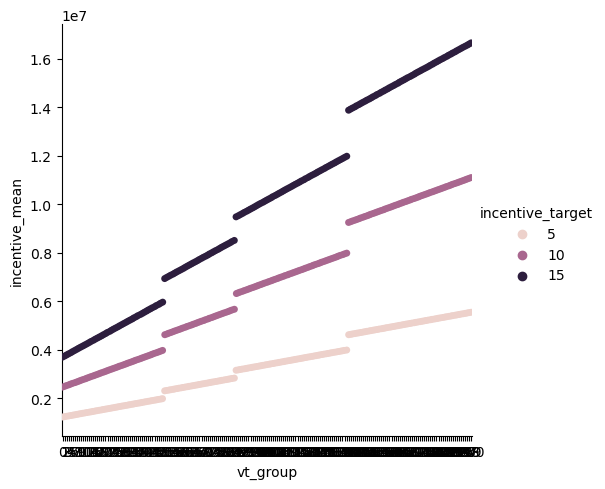

In [38]:
# Average incentive
sns.catplot(data=result, hue="incentive_target",
            x="vt_group", y="incentive_mean");

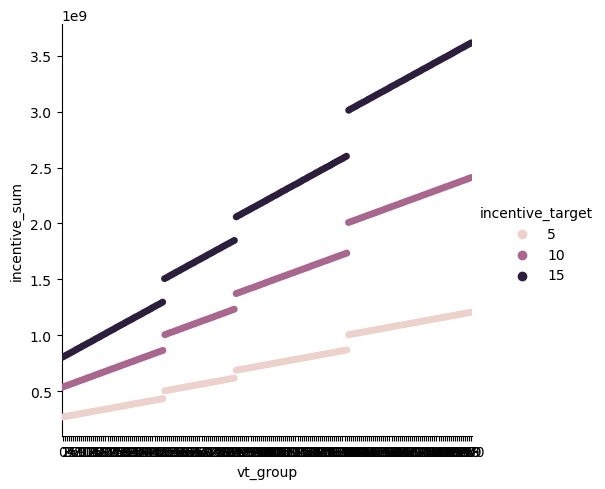

In [39]:
# Total incentive
sns.catplot(data=result, hue="incentive_target",
            x="vt_group", y="incentive_sum");

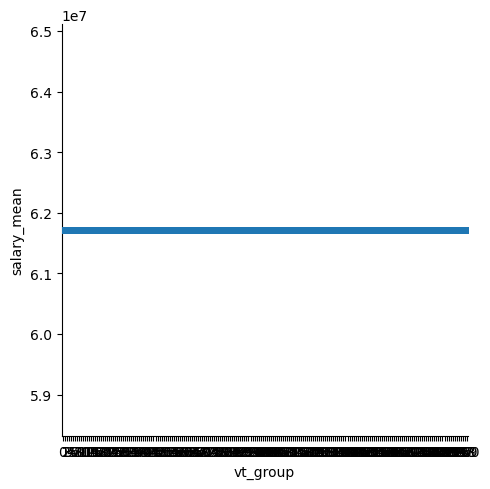

In [40]:
# Average salary
sns.catplot(data=result,
            x="vt_group", y="salary_mean");

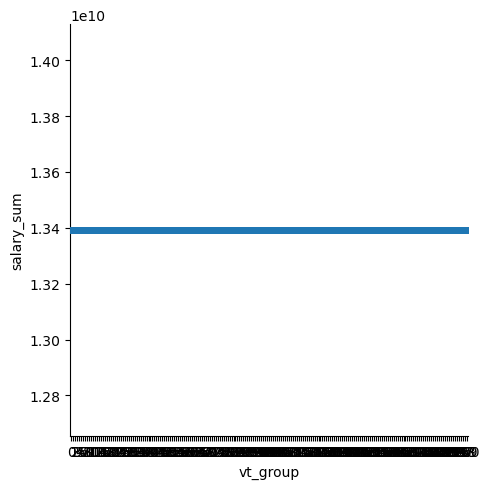

In [41]:
# Total salary
sns.catplot(data=result,
            x="vt_group", y="salary_sum");